In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

In [2]:
def f(x, power, coeff):
    summ = 0
    xk = 1
    coeff = list(map(float, coeff))
    for i in range(int(power), -1, -1):
        summ += float(xk) * coeff[i]
        xk *= x
    return summ

In [3]:
def f2(x, power, coeff):
    summ = 0
    xk = 1
    coeff = list(map(float, coeff))
    for i in range(int(power), -1, -1):
        summ += xk * coeff[i]
        xk *= x
    return summ

In [4]:
def fprime(x, power, coff):
    return sym.diff(f2(x, power, coff), x)

In [16]:
def grad_descent(X, Y, power, coff, eps=0.05, max_iter=200, precision=0.00001):
    X_old = 0
    X_new = 4.9
    Xs = np.zeros(max_iter)
    Ys = np.zeros(max_iter)
    i = 0
    x = sym.symbols('x')
    dfr = fprime(x, power, coff) #diferansiyel
    
    while abs(X_new - X_old) > precision and max_iter > i:
        Xs[i] = X_new
        Ys[i] = f(X_new, power, coff)

        X_old = X_new
        
        df = dfr.evalf(subs={x: X_old})
        X_new = X_old - eps * df
        eps *= 0.99
        i += 1
    return Xs, Ys

In [6]:
X = np.arange(-5, 5, 0.1)
Y = np.zeros(len(X))
power = input("Enter power of the function: ")
coeff = input("Enter the function's coefficients: ")
coeff = coeff.split()
for i in range(len(X)):
    Y[i] = f(X[i], power,  coeff)

Enter power of the function: 2
Enter the function's coefficients: 1 0 0


In [17]:
x_list, y_list = grad_descent(X, Y, power, coeff)

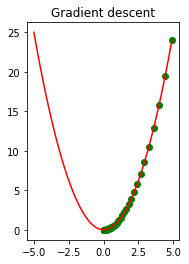

In [18]:
plt.subplot(1,2,2)
plt.scatter(x_list,y_list,c="g")
plt.plot(X, Y, c="r")
plt.title("Gradient descent")
plt.show()

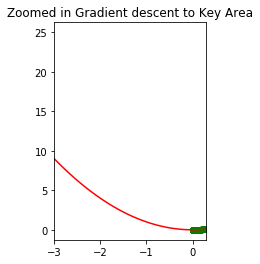

In [15]:
plt.subplot(1,2,1)
plt.scatter(x_list,y_list,c="g")
plt.plot(X, Y, c="r")
plt.xlim([-3.0,0.3])
plt.title("Zoomed in Gradient descent to Key Area")
plt.show()